In [2]:
library(asbio)
data(veneer)

Loading required package: tcltk


In [16]:
head(veneer)
dim(veneer)
veneer

wear,brand
2.3,ACME
2.1,ACME
2.4,ACME
2.5,ACME
2.2,CHAMP
2.3,CHAMP


[1] 20  2

wear,brand
2.3,ACME
2.1,ACME
2.4,ACME
2.5,ACME
2.2,CHAMP
2.3,CHAMP
2.4,CHAMP
2.6,CHAMP
2.2,AJAX
2.0,AJAX


In [6]:
levels(factor(veneer$brand))

[1] "ACME"  "AJAX"  "CHAMP" "TUFFY" "XTRA"

In [9]:
tapply(veneer$wear, veneer$brand, mean)

ACME  AJAX CHAMP TUFFY  XTRA 
2.325 2.050 2.375 2.600 2.375

In [20]:
champ <- veneer[veneer$brand == 'CHAMP', 1]
srednia <- mean(champ)
srednia

[1] 2.375

Oblicz odchylenie standardowe korzystając z estymatora nieobciążonego wariancji. Czy jest to estymator nieobciążony odchylenia standardowego?

In [32]:
var_est <- 1/(length(champ)-1) * sum((champ-srednia)**2) 
sd_est <- sqrt(var_est)
var_est
sd_est

[1] 0.02916667

[1] 0.1707825

In [34]:
sd_mle <- sqrt(1/(length(champ)) * sum((champ-srednia)**2))
sd_mle

[1] 0.147902

In [37]:
sd(champ)
sqrt(var(champ))

sqrt(var(champ)) == sd(champ)

[1] 0.1707825

[1] 0.1707825

[1] TRUE

In [119]:
sd_estim <- function (values) {
    sqrt(1/(length(values)-1) * sum((values-mean(values))**2))
}

In [120]:
make_estimates <- function(n_estim, n_samples, fun) {
    apply(replicate(n_estim, fun(n=n_samples, rate=0.1)), 2, sd_estim)
}

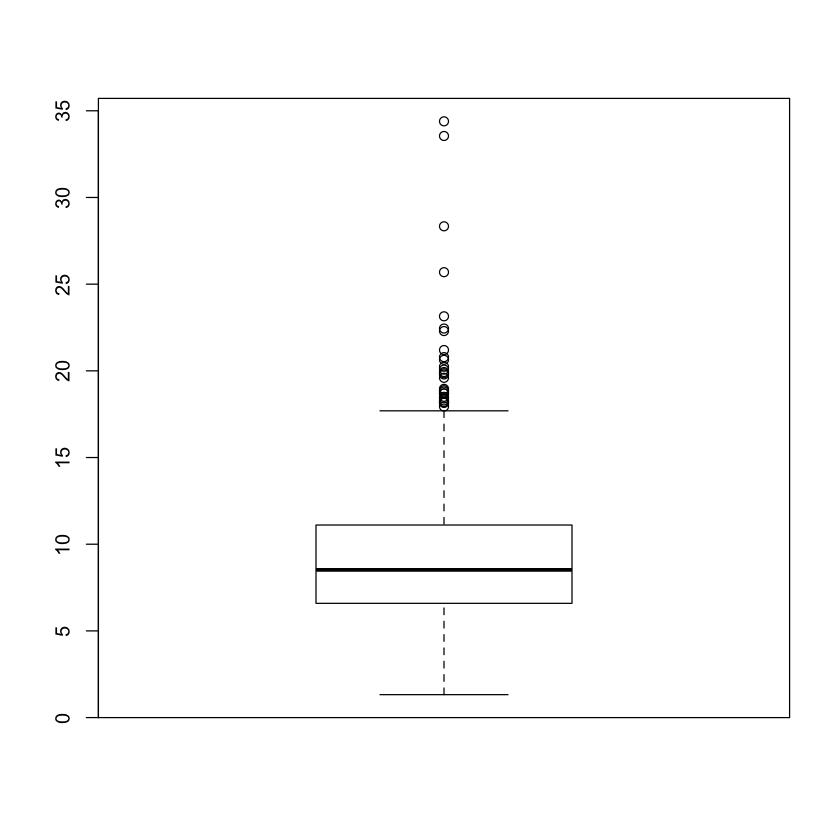

In [121]:
boxplot(make_estimates(1000, 10, rexp))

In [122]:
ns <- seq(10, 1000, by=10)
estims <- sapply(seq(10, 1000, by=10), function(x) mean(make_estimates(1000, x, rexp)))

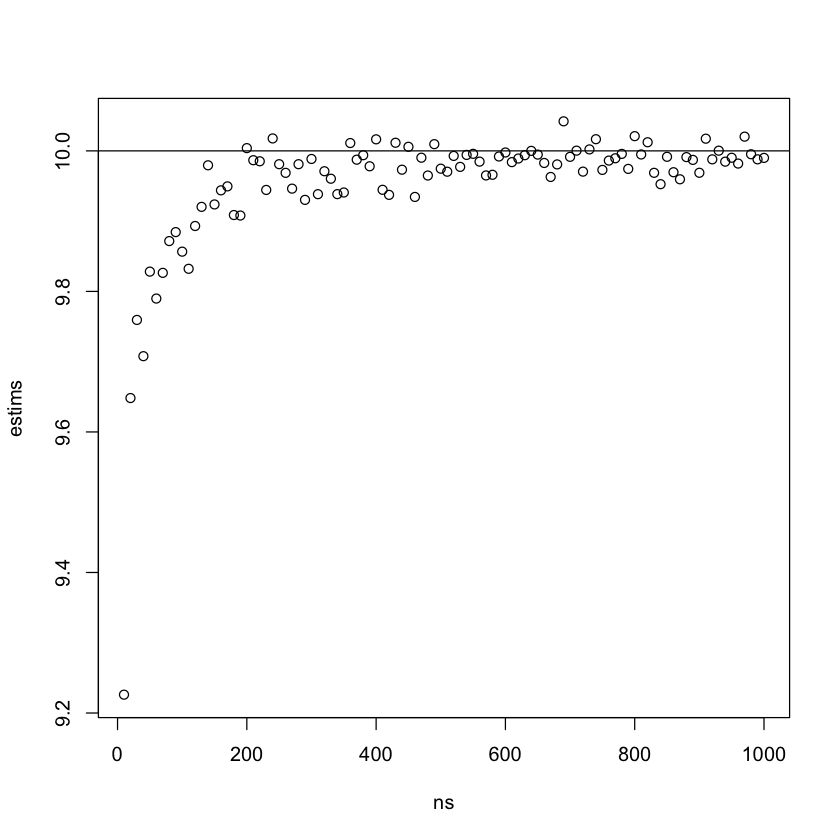

In [124]:
plot(ns, estims);abline(10, 0)

In [104]:
help(abline)

In [125]:
make_var_estimates <- function(n_estim, n_samples, fun) {
    apply(replicate(n_estim, fun(n=n_samples, rate=0.1)), 2, var)
}

In [126]:
estims <- sapply(seq(10, 1000, by=10), function(x) mean(make_var_estimates(1000, x, rexp)))

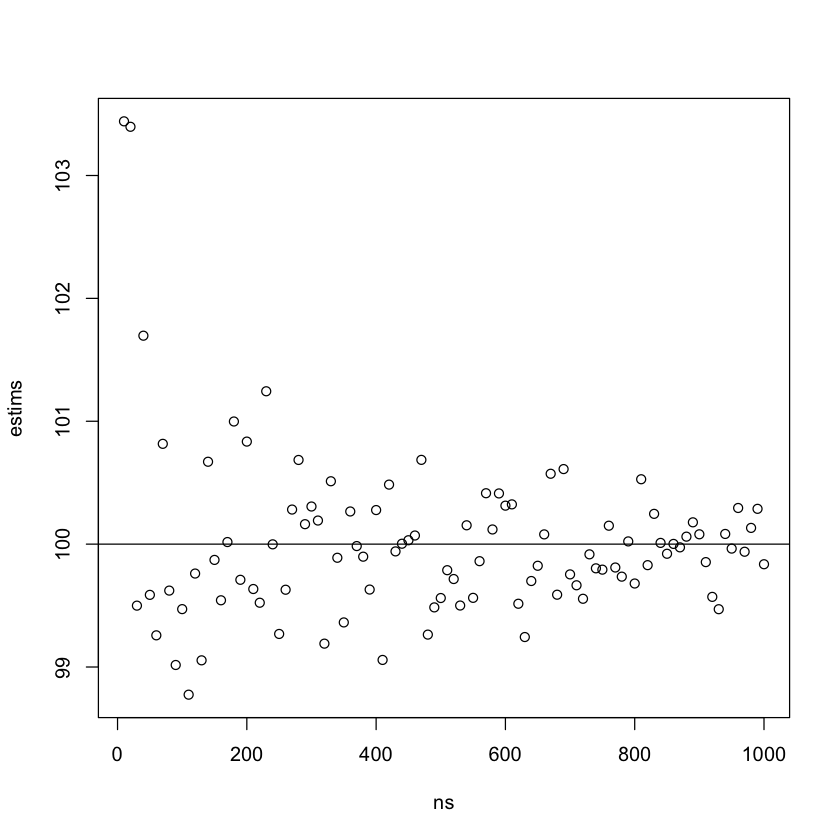

In [127]:
plot(ns, estims);abline(100, 0)

In [128]:
library(MASS)

In [129]:
data(topo)

In [130]:
head(topo)

x,y,z
0.3,6.1,870
1.4,6.2,793
2.4,6.1,755
3.6,6.2,690
5.7,6.2,800
1.6,5.2,800


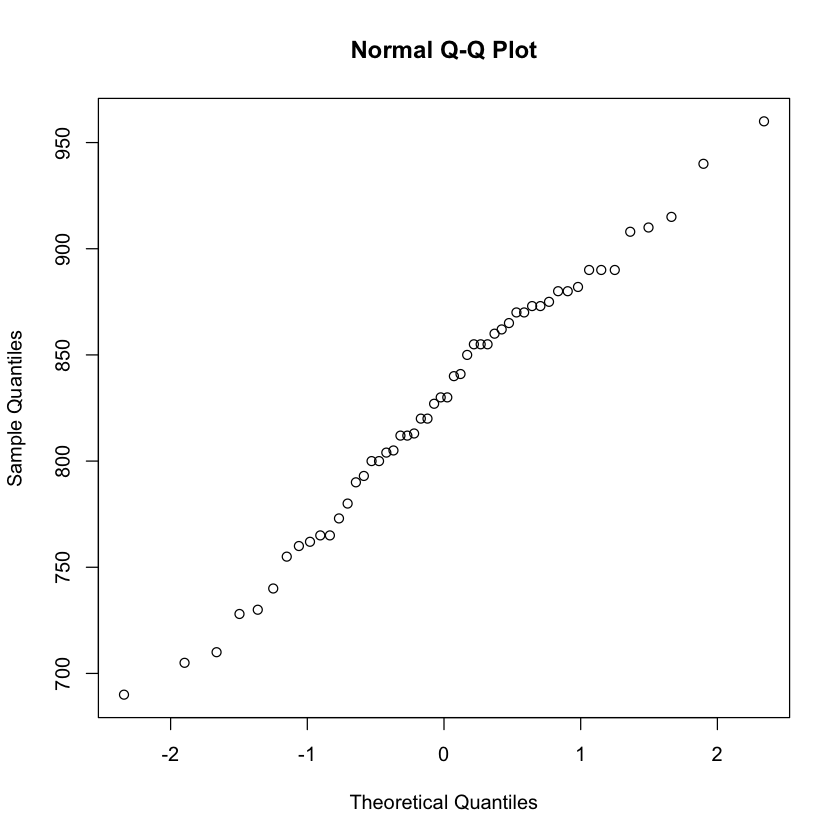

In [131]:
qqnorm(topo$z)

In [142]:
student.interval <- function(X, alpha) {
    X.mean = mean(X)
    X.sd = sd(X)
    n = length(X)
    q = qt(1-alpha/2, n-1)
    c(X.mean - q * X.sd/sqrt(n-1), X.mean+q * X.sd/(sqrt(n-1)))
}

In [143]:
student.interval(topo$z, 0.05)

[1] 809.6482 844.5056

In [144]:
asymp <- function(X, alpha) {
    X.mean = mean(X)
    X.sd = sd(X)
    n = length(X)
    q = qnorm(1-alpha/2)
    c(X.mean - q * X.sd/sqrt(n-1), X.mean+q * X.sd/(sqrt(n-1)))
}

In [145]:
asymp(topo$z, 0.05)

[1] 810.0617 844.0922

In [152]:
sampled = sample(topo$z, 10)
student.interval(sampled, 0.05)
asymp(sampled, 0.05)


[1] 788.8827 892.1173

[1] 795.7781 885.2219

In [157]:
unif_estim <- function(n_estim, n_samples, a) {
    apply(replicate(n_estim, runif(n=n_samples, max=a)), 2, max)
}

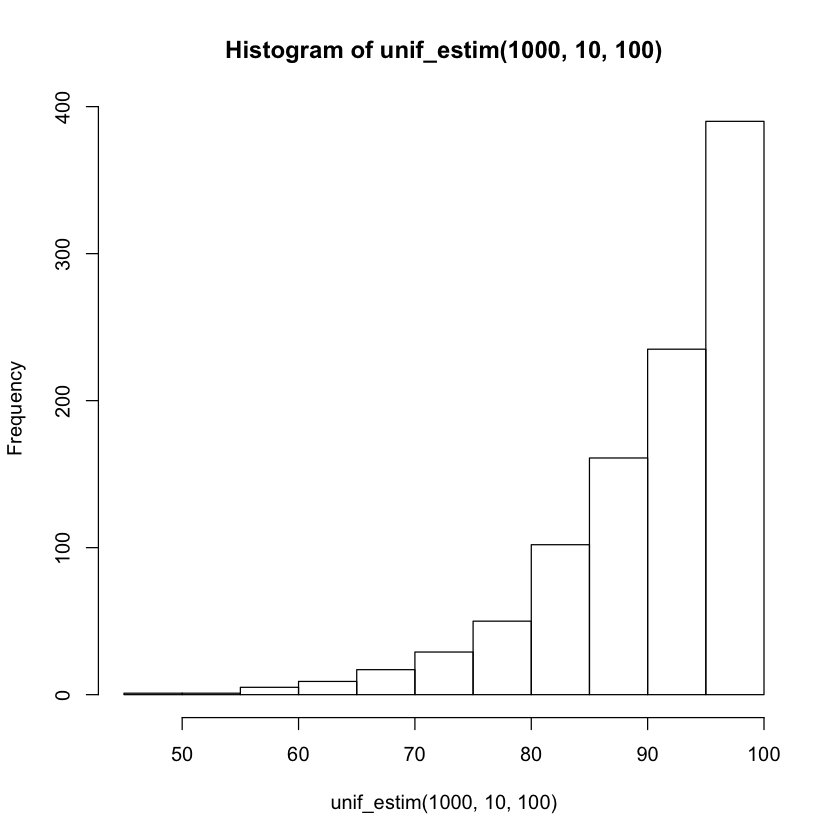

In [159]:
hist(unif_estim(1000, 10, 100))

In [160]:
conf_interval <- function(X,alpha) {
    c(max(X), max(X)/(alpha**(1/length(X))))
}

In [209]:
a = 100
proby <- replicate(1000, runif(n=10, max=a))
intervals <- t(apply(proby, 2, conf_interval, alpha=0.01))

In [210]:
contain <- intervals[intervals[,1] <= a & intervals[,2] >= a]
length(contain) / length(intervals)


[1] 0.986